# LAB 2. ÔN TẬP VIỆC DÙNG CÁC THƯ VIỆN
### Xác suất cho Khoa học dữ liệu. Ngày 09/03/2022.

## 1. CÔNG THỨC CƠ BẢN

In [53]:
import math
math.factorial(6) #tính giai thừa, chỉ nhận đầu vào là số nguyên không âm

720

In [54]:
from scipy import special
special.binom(5,4) # tính tổ hợp chập k của n
special.comb(5, 4)  # vẫn là tính tổ hợp chập k của n
special.comb(5, 4, exact=True) # làm tròn

5

**Yêu cầu:**
Hãy nhớ lại công thức tính $C(n,k)$ theo $n!, k!$ và viết đoạn code tính $C(100,20)$ theo 2 cách.

In [43]:
#Tổ hợp chập k của n là n! / (k!(n-k)!)
def C(n,k):
    X = math.factorial(n)/(math.factorial(k)*math.factorial(n-k))
    return int(X)
C(100,20)

535983370403809656832

In [38]:
special.comb(100, 20, exact=True)

535983370403809682970

**Chú ý.** Qua bài này, ta thấy rằng 2 cách tính trên có sai số nhất định. Điều này cho thấy rằng ta nên dùng các thư viện có sẵn của Python thay vì dùng các hàm tự định nghĩa.

## 2. CÁC THƯ VIỆN CHO PHÂN PHỐI

**Yêu cầu:** Cho các đoạn code bên dưới của thư viện spipy dùng cho các phân phối đã biết. Hãy chạy từng dòng code và ghi chú lại ý nghĩa của từng hàm.

In [120]:
#pmf = probability mass function: hàm phân phối xác suất
#cdf = cummulative distribution function: hàm tích lũy xác suất (kiểu tính tổng P(X=0) + P(X=1) + ...)
#mean = kỳ vọng  ~ trung bình cộng
#var = varian: phương sai
#std = standard deviation: độ lệch chuẩn
#rvs = random value in sample: lấy một giá trị bất kỳ trong không gian mẫu của X

from scipy import stats
X = stats.binom(10, 0.2)  # Khai báo X là một phân phối nhị thức có n=10 và p=0.2
print('pmf',X.pmf(3))     # P(X = 3) công thức: P(X=k) = C(n,k)*p^k*(1-p)^(n-k)
print('cdf',X.cdf(4))     # P(X <= 4) = P(X=0)+P(X=1)+P(X=2)+P(X=3)+P(X=4)
print('mean',X.mean())    # E[X]
print('var',X.var())      # Var(X)
print('std',X.std())      # Std(X)
print(X.rvs())            # lấy 1 giá trị bất kỳ trong không gian mẫu của X
print(X.rvs(10))          # lấy 10 giá trị bất kỳ trong không gian mẫu của X

pmf 0.20132659200000022
cdf 0.9672065024000001
mean 2.0
var 1.6
std 1.2649110640673518
0
[4 2 3 2 3 6 2 4 2 4]


In [4]:
from scipy import stats
Y = stats.poisson(2) # Khai báo Y là một phân phối Poisson với biến lamda = 2
Y.mean()             # P(Y = 3) Công thức P(X=k)=lamda^k * e^(-k) / k!
Y.std()
#Y.rvs()             # random 1 giá trị bất kỳ trong không gian mẫu của Y

1.4142135623730951

In [72]:
from scipy import stats
Z = stats.geom(0.75) # Khai báo Z là một phân phối hình học với biến p = 0.75
Z.pmf(3)             # P(X = 3) Công thức P(X=k) = (1-p)^(k-1)*p
Z.rvs(10)            # random 10 giá trị bất kỳ trong không gian mẫu của Z

array([2, 1, 1, 1, 2, 1, 1, 1, 1, 1])

## 3. CÁC BÀI TOÁN SIMULATION ĐƠN GIẢN

Hãy đọc hiểu code bên dưới về việc tung một đồng xu đồng chất (fair coin) nhiều lần và tính kỳ vọng số mặt sấp - ngửa.

In [8]:
import random
def coin_trial():
    return random.random() <= 0.5 # nếu random được số <= 0.5 thì có ngửa; ngược lại là sấp
def simulate(n):
    trials = []
    for i in range(n):
        trials.append(coin_trial())
 #   return trials
    return sum(trials) / n
simulate(100000)

0.49902

**Yêu cầu:**
1) Hãy viết lại đoạn code khi thêm tham số p là xác suất để thu được mặt sấp (ở trên mặc định p = 0.5). <br>
2) Viết lại đoạn code tính kỳ vọng tung xúc sắc 6 mặt.

**Yêu cầu 1.**

In [54]:
def coin_trial_1(p): # BÀI 1
    return random.random() <= p
def simulate_1(n,p):
    trials = []
    for i in range(n):
        trials.append(coin_trial_1(p))
 #   return trials
    return sum(trials)
simulate_1(100000, 0.3)

30170

**Yêu cầu 2.**

In [52]:
def dice_trial():  # BÀI 2
    return random.randint(1,6)
def simulate_2(n):
    trials = []
    for i in range(n):
        trials.append(dice_trial())
    #return trials
    return sum(trials) / n
simulate_2(1000)

3.483

**Chú ý.** Thử thay bằng return trials để thấy danh sách kết quả.

## 4. VẼ ĐỒ THỊ CƠ BẢN

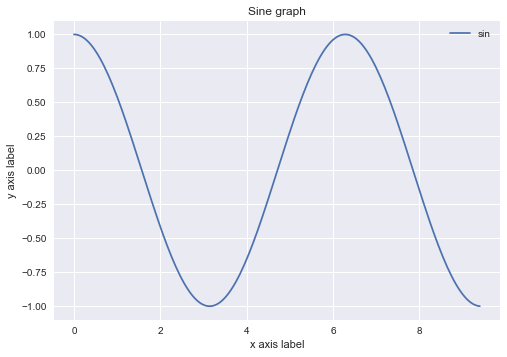

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
x = np.arange(0, 3*np.pi, 0.05)
y = np.cos(x)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine graph')
plt.plot(x, y, label='sin')
plt.legend()

**Yêu cầu.** Hãy đọc cách vẽ đồ thị trên và thử thay đổi giá trị của các biến trong dòng $x=np.arange(?, ?, ?)$ để hiểu ý nghĩa của từng tham số. Từ đó, hãy tự code tiếp:
1. Vẽ đồ thị của hàm số $y = x^3-2x-3$ trên miền $[-1;3]$, bước nhảy là $0.05.$
2. Vẽ đồ thị của ba hàm số $y=sinx, y=1/x, y=x$ trên cùng một hệ trục tọa độ (khoảng giá trị và bước nhảy tùy chọn).
3. Vẽ giá trị của hàm $simulate(n)$ ở trên với $n$ trong miền từ $[1;1000].$

**Yêu cầu 1.**

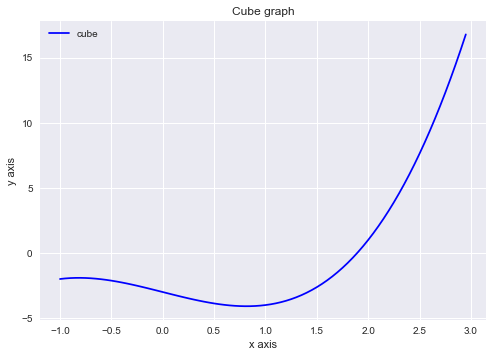

In [5]:
x = np.arange(-1,3, 0.05)
y = x*x*x-2*x-3
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Cube graph')
plt.plot(x, y, label='cube', color = 'blue')
plt.legend();

**Yêu cầu 2.**

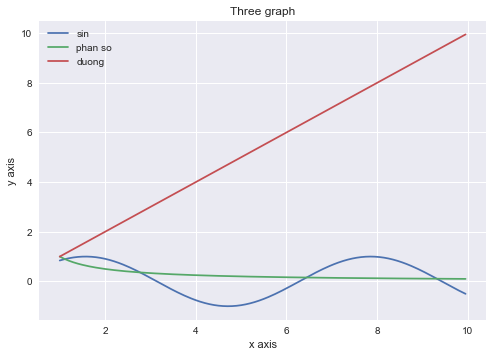

In [6]:
x = np.arange(1,10,0.05)
y1 = np.sin(x)
y2 = 1/x
y3 = x
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Three graph')
plt.plot(x, y1, label='sin')
plt.plot(x, y2, label='phan so')
plt.plot(x, y3, label='duong')
plt.legend();

**Chú ý:** SV xem thêm một số cách vẽ đồ thị khác tại đây: https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/

**Yêu cầu 3.**

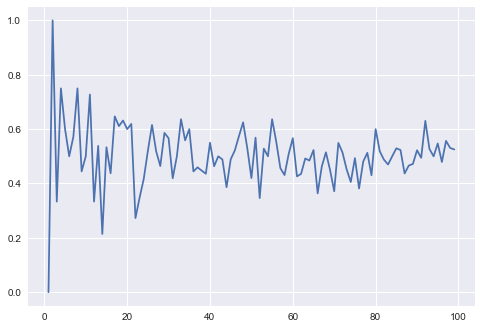

In [9]:
result = []
for i in range(1,100):
    result.append(simulate(i))
x = np.arange(1,100)
plt.plot(x, result)
plt.show()

## 5. GIỚI THIỆU VỀ BIẾN NGẪU NHIÊN LIÊN TỤC

Trên thực tế, ta thường gặp các đại lượng ngẫu nhiên nhận giá trị trong một phạm vi nào đó và nó lấp đầy một khoảng hoặc toàn bộ trục số. Khi đó, với mọi số thực $a$, ta đều có $P(X=a)=0.$ <br>
*VD: lượng mưa vào tháng này là một đại lượng ngẫu nhiên liên tục trên miền $(0;+\infty)$, trọng lượng của một đứa trẻ sơ sinh,...*

Hàm số $f(x)$ xác định trên $\mathbb{R}$ được gọi là hàm mật độ của đại lượng ngẫu nhiên liên tục $X$ nếu như $f(x) \ge 0, \forall x \in \mathbb{R}$, đồng thời $$P(a < X < b) = \int_{a}^{b} f(x)dx \text{ và } \int_{-\infty}^{+\infty} f(x)dx = 1.$$

**Ví dụ.** Tuổi thọ của một loài côn trùng (đơn vị tháng) là một đại lượng ngẫu nhiên liên tục $X$ có hàm mật độ $f(x)$ là 
$$f(x)=\left\{ \begin{align}
  & k{{x}^{2}}(4-x),\text{   }0 \le x \le 4 \\ 
 & 0,\text{                 }x > 4 \vee x < 0 \\ 
\end{align} \right..$$
1. Tìm $k$ và vẽ đồ thị của $f(x).$
2. Tính xác suất để tuổi thọ của côn trùng trong khoảng $2$ đến $3$ tháng.
3. Tìm $mode(X).$

In [ ]:
#Tính tích phân của f(x) từ -vô cực đến +vô cực, theo tham số k => cho tích phân bằng 1 => tìm k.
#Với k đó, ta vẽ đồ thị => 3 nhánh: (-vô cực; 0) và (0;4) và (4;+vô cực)

Ta có: 
$$\begin{align}
  & \int_{-\infty }^{+\infty }{f(x)dx}=\int_{-\infty }^{0}{f(x)dx}+\int_{0}^{4}{f(x)dx}+\int_{4}^{+\infty }{f(x)dx} \\ 
 & =0+\int_{0}^{4}k{{{x}^{2}}(4-x)dx}+0 = k \int_{0}^{4}{{{x}^{2}}(4-x)dx}.\\ 
\end{align}$$
Ta tính tích phân bằng thư viện Sympy như bên dưới:

In [8]:
import sympy as sym
x = sym.symbols('x')
sym.integrate(x*x*(4-x), (x, 0, 4))

64/3

Do đây là hàm phân bố xác suất nên phải có $$\frac{64k}{3}=1\Leftrightarrow k=\frac{3}{64}.$$
Ta vẽ đồ thị như sau:

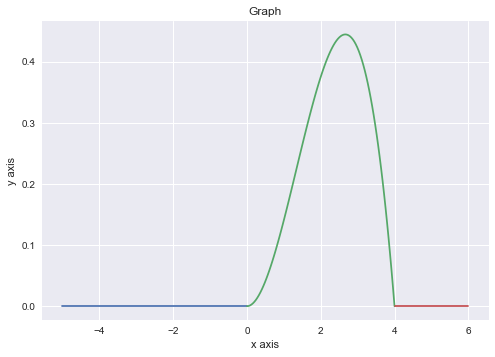

In [3]:
import matplotlib.pyplot as plt
x1 = np.linspace(-5,0,100)
x2 = np.linspace(0,4,100)
x3 = np.linspace(4,6,100)
y1 = 0*x1
y2 = 3/64*x2*x2*(4-x2)
y3 = 0*x3
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Graph')
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.show()

Để tìm $mod$, ta xét $${f}'(x)={{\left( \frac{3}{64}{{x}^{2}}(4-x) \right)}^{\prime }}=\frac{3}{64}(8x-3{{x}^{2}})$$ nên $${f}'(x)=0\Leftrightarrow x=0,x=\frac{8}{3}.$$
Ta có $${{f}''}(x)=\frac{3}{64}(8-6x)$$ có đạo hàm cấp hai ${{f}''}\left( \frac{8}{3} \right)<0$ nên $f(x)$ đạt giá trị lớn nhất tại $x=\frac{8}{3}$, điều này chứng tỏ $mod=8/3$. 
